# ARTIFICIAL NEURAL NETWORK
 - CLASSFICATION
 - REGRESSION

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron

In [ ]:
x =[[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,1]

In [ ]:
model = Perceptron()
model.fit(x,y)
print('độ chính xác của mô hình', model.score(x,y))
test = [[0.5,0],[0.9,0],[0.1,0.1]]
print(model.predict(test))

độ chính xác của mô hình 1.0
[0 1 0]


In [ ]:
x1 = np.array([[-0.3,-0.5,0.3,-0.1]]).T
x2 = np.array([[-0.5,0.5,-0.5,1]]).T
y = np.array([1,1,0,0])
x = np.concatenate((x1, x2), axis=1)
model.fit(x,y)
print('độ chính xác của mô hình', model.score(x,y))
test = [[1,0.2],[-1.2,-0.1],[0.3,0.9],[1,-0.5]]
print(model.predict(test))

độ chính xác của mô hình 1.0
[0 1 0 0]


# crab.csv

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/crabs.csv'
data = pd.read_csv(path)
data

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8


In [ ]:
species_B = data[data['speies'] == 'B']
species_B

,speies,sex,index,fontallip,rearwidth,length,width,depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...,...
95,B,F,46,16.4,14.0,34.2,39.8,15.2
96,B,F,47,16.7,16.1,36.6,41.9,15.4
97,B,F,48,17.4,16.9,38.2,44.1,16.6
98,B,F,49,17.5,16.7,38.6,44.5,17.0


In [ ]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
species_B['encoded_sex'] = le.fit_transform(species_B['sex'])
species_B = species_B.drop(labels = 'sex', axis = 1 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
species_B = species_B.drop(['speies'], axis = 1)

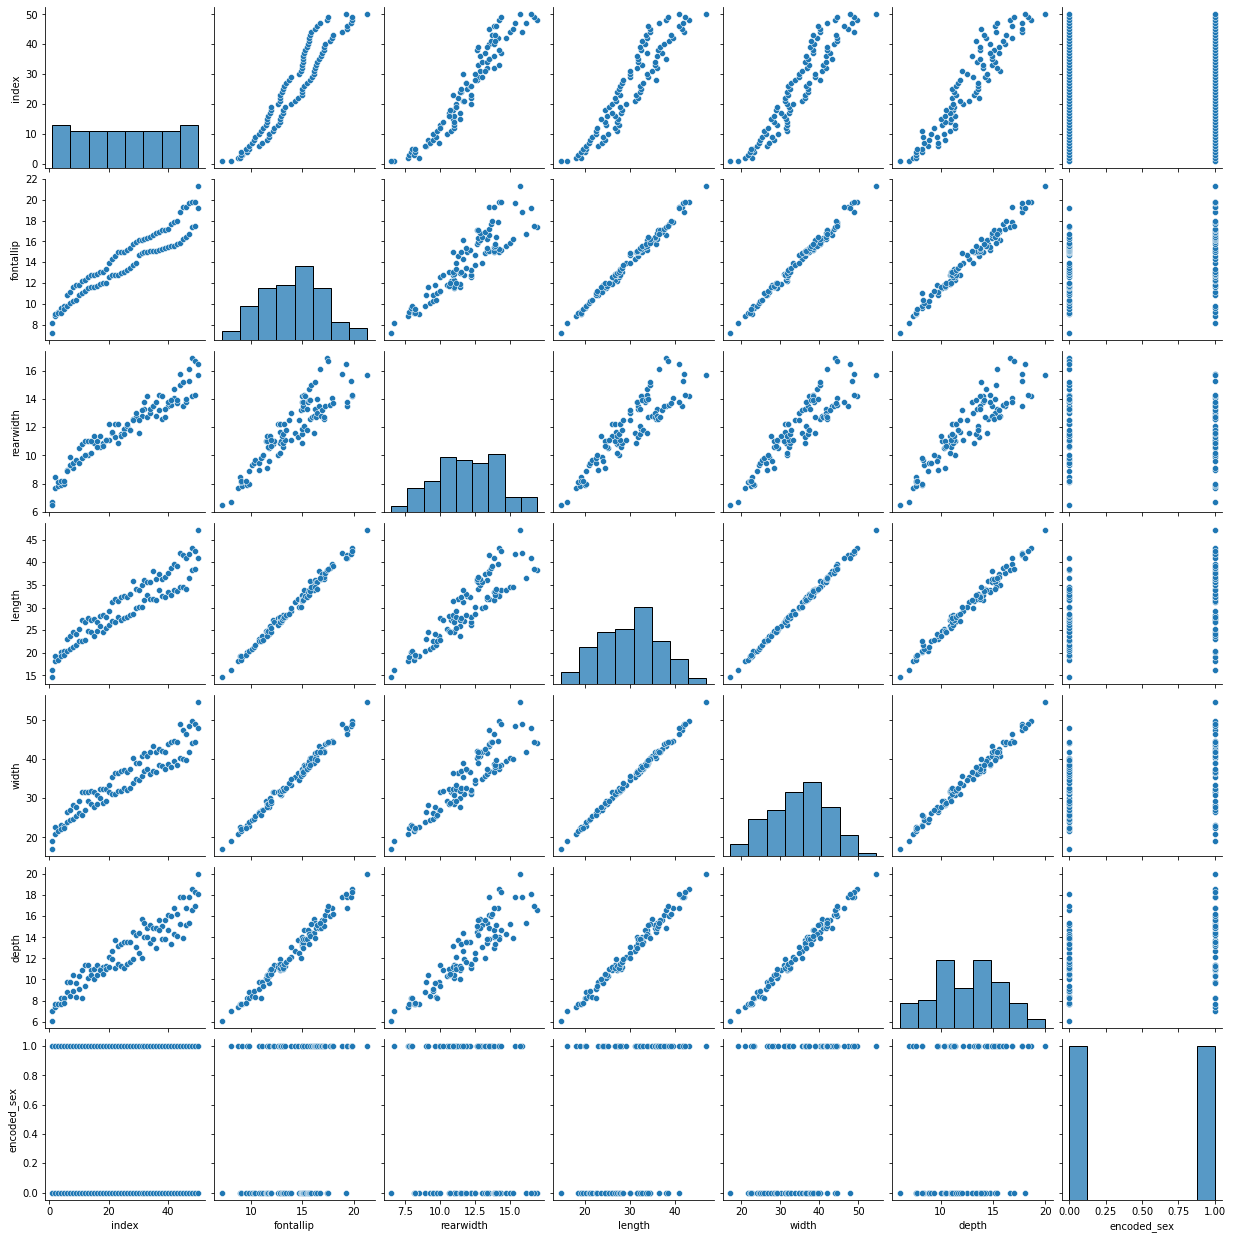

In [ ]:
sns.pairplot(species_B)

In [ ]:
correlation = species_B.corr()
correlation

,index,fontallip,rearwidth,length,width,depth,encoded_sex
index,1.000000e+00,0.947456,0.954739,0.937498,0.941845,0.942955,4.431392e-17
fontallip,9.474557e-01,1.000000,0.897852,0.995111,0.995369,0.988624,2.616099e-01
rearwidth,9.547387e-01,0.897852,1.000000,0.896381,0.904174,0.904213,-9.259807e-02
length,9.374985e-01,0.995111,0.896381,1.000000,0.998593,0.991888,2.847948e-01
width,9.418452e-01,0.995369,0.904174,0.998593,1.000000,0.992562,2.674210e-01
depth,9.429549e-01,0.988624,0.904213,0.991888,0.992562,1.000000,2.512687e-01
encoded_sex,4.431392e-17,0.261610,-0.092598,0.284795,0.267421,0.251269,1.000000e+00


In [ ]:
train, test = train_test_split(species_B, test_size = 0.2, random_state = 42)
print(train.shape)
print(test.shape)

(80, 7)
(20, 7)


In [ ]:
# Train
X_train = train.drop(['encoded_sex'], axis = 1).values # taking the training data features
y_train = train['encoded_sex'].values
# Test
X_test = test.drop(['encoded_sex'], axis = 1).values # taking test data features
y_test =test['encoded_sex'].values

In [ ]:
model = Perceptron(max_iter = 10000, eta0 = 0.001, random_state = 10)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the Perceptron is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Perceptron is 0.95


In [ ]:
print('The accuracy of the Percemtron is',metrics.accuracy_score(y_train,model.predict(X_train)))

The accuracy of the Percemtron is 0.9125


In [ ]:
expected = y_test
predicted = model.predict(X_test)
comparison = pd.DataFrame({'Expected':le.inverse_transform(y_test), 'Predicted':le.inverse_transform(predicted)})
comparison

,Expected,Predicted
0,F,F
1,F,F
2,F,F
3,M,M
4,M,M
5,M,M
6,M,M
7,F,F
8,M,M
9,M,M


In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[ 8  0]
 [ 1 11]]


# Iris dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
# store feature matrix in "X"
X = iris.data
# store response vector in "y"
y = iris.target
y[y==2]=0
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
model = Perceptron(max_iter = 100000, eta0 = 0.001, random_state = 25) # 25
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the Perceptron is',metrics.accuracy_score(prediction,y_test))
print('The accuracy of the Perceptron is',metrics.accuracy_score(model.predict(X_train),y_train))

The accuracy of the Perceptron is 0.8333333333333334
The accuracy of the Perceptron is 0.7666666666666667


# GENDER CLASSIFICATION

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/data/gender_classification_v7.csv'
data = pd.read_csv(path)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

data['encoded_gender'] = le.fit_transform(data['gender'])
data = data.drop(labels = 'gender', axis = 1)
data 

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,encoded_gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [9]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [16]:
# Prepare data
X = data.drop(labels = 'encoded_gender', axis = 1)
y = data['encoded_gender']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 7)
(4000,)
(1001, 7)
(1001,)


## Using perceptron 

In [17]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter = 10000, eta0 = 0.001, random_state = 10)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the testset is',metrics.accuracy_score(prediction,y_test))
print('The accuracy of the trainset is',metrics.accuracy_score(y_train,model.predict(X_train)))

The accuracy of the testset is 0.9530469530469531
The accuracy of the trainset is 0.954


## Using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)
prediction = model_logistic.predict(X_test)
print('The accuracy of the testset is',metrics.accuracy_score(prediction,y_test))
print('The accuracy of the trainset is',metrics.accuracy_score(y_train,model_logistic.predict(X_train)))

The accuracy of the testset is 0.9600399600399601
The accuracy of the trainset is 0.97


In [28]:
predicted = model_logistic.predict(X_test)[:20]
comparison = pd.DataFrame({'Expected':le.inverse_transform(y_test[:20]), 'Predicted':le.inverse_transform(predicted)})
comparison

,Expected,Predicted
0,Male,Male
1,Female,Female
2,Female,Female
3,Male,Male
4,Male,Male
5,Female,Male
6,Male,Male
7,Male,Male
8,Male,Male
9,Female,Female


In [29]:
print(metrics.classification_report(y_test, model_logistic.predict(X_test)))
print(metrics.confusion_matrix(y_test, model_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       502
           1       0.97      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

[[485  17]
 [ 23 476]]


## Breast Cancer

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy

In [31]:
path = '/content/drive/MyDrive/Colab Notebooks/data/breast-cancer.csv'
data = pd.read_csv(path)
data

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


In [44]:
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [41]:
column_categories = data.describe(include = 'object').columns
column_categories

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast',
       'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [46]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
encoded_data = pd.DataFrame()
encoded_data['deg-malig'] = data['deg-malig']
for column in column_categories:
  encoded_data[column] = le.fit_transform(data[column])
encoded_data

,deg-malig,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat,Class
0,3,2,2,2,0,1,1,2,0,1
1,1,3,0,2,0,0,1,0,0,0
2,2,3,0,6,0,0,0,1,0,1
3,3,2,2,6,0,1,1,1,1,0
4,2,2,2,5,4,1,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
281,2,3,0,5,5,1,0,1,0,0
282,2,3,2,4,4,1,0,1,1,0
283,2,1,2,5,5,1,1,4,0,0
284,2,3,2,2,0,0,1,1,0,0


In [51]:
# Prepare data
X = encoded_data.drop(labels = 'Class', axis = 1)
y = encoded_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(228, 9)
(228,)
(58, 9)


## Using Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)
prediction = model_logistic.predict(X_test)
print('The accuracy of the testset is',metrics.accuracy_score(prediction,y_test))
print('The accuracy of the trainset is',metrics.accuracy_score(y_train,model_logistic.predict(X_train)))

The accuracy of the testset is 0.8103448275862069
The accuracy of the trainset is 0.7456140350877193


## Using Perceptron

In [72]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter = 10000, eta0 = 0.001, random_state = 42) #42
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of the testset is',metrics.accuracy_score(prediction,y_test))
print('The accuracy of the trainset is',metrics.accuracy_score(y_train,model.predict(X_train)))

The accuracy of the testset is 0.7758620689655172
The accuracy of the trainset is 0.7280701754385965


In [73]:
predicted = model_logistic.predict(X_test)[:20]
comparison = pd.DataFrame({'Expected':le.inverse_transform(y_test[:20]), 'Predicted':le.inverse_transform(predicted)})
comparison

,Expected,Predicted
0,no-recurrence-events,no-recurrence-events
1,recurrence-events,no-recurrence-events
2,no-recurrence-events,no-recurrence-events
3,no-recurrence-events,no-recurrence-events
4,no-recurrence-events,no-recurrence-events
5,no-recurrence-events,no-recurrence-events
6,no-recurrence-events,no-recurrence-events
7,recurrence-events,recurrence-events
8,recurrence-events,no-recurrence-events
9,no-recurrence-events,no-recurrence-events


In [78]:
print(metrics.classification_report(y_test, model_logistic.predict(X_test)))
print(metrics.confusion_matrix(y_test, model_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        40
           1       1.00      0.39      0.56        18

    accuracy                           0.81        58
   macro avg       0.89      0.69      0.72        58
weighted avg       0.85      0.81      0.78        58

[[40  0]
 [11  7]]
